#### Thanks to:
- Amira Adel Foda (intake 42 - smart village branch - group 2)
- Asmaa Said (intake 42 - smart village branch - group 2)
- Marawan Mohamed (intake 42 - Alex. branch - group 2)


### Installing MediaPipe

In [2]:
%%capture
!pip install mediapipe

### Required Libraries

In [3]:
!pip install sklearn

In [4]:
import numpy as np
import os
import scipy.io as sio
import cv2
import math
import dlib
import glob
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
from math import cos, sin
#import cvxopt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
import mediapipe
import warnings
warnings.filterwarnings('ignore')
#from google.colab.patches import cv2_imshow

### Dowlining Data

In [5]:
# link of the data
# http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip

In [6]:
# Loading AFLW2000 Data
%%capture
if os.path.isfile('/content/AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

UsageError: Line magic function `%%capture` not found.


In [7]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

### Preparing Data

0.48561131954193115
0.4891773760318756
0.48977676033973694
0.4797110855579376
0.4905228614807129
0.493611603975296
0.5031788945198059
0.36366036534309387
0.5086324214935303
0.5105621814727783
0.5210801362991333
0.48478811979293823
0.4847624897956848
0.4854271113872528
0.48264843225479126
0.48155859112739563
0.4805559515953064
0.4802633821964264
0.4817713797092438
0.48897674679756165
0.47206053137779236
0.29518187046051025
0.4270310401916504
0.40612849593162537
0.3848588168621063
0.35674387216567993
0.44298404455184937
0.39228081703186035
0.4170582592487335
0.370713472366333
0.35712140798568726
0.3399127721786499
0.4128836691379547
0.354734867811203
0.2839815020561218
0.31771790981292725
0.3970697522163391
0.4601508378982544
0.46334749460220337
0.43541496992111206
0.42184799909591675
0.446310430765152
0.4342338740825653
0.3971051275730133
0.4733141362667084
0.47164252400398254
0.32933861017227173
0.44201603531837463
0.43225109577178955
0.4324617385864258
0.33954185247421265
0.4754269421

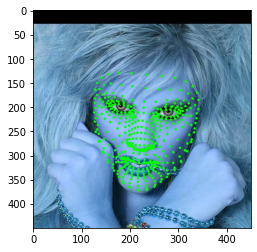

In [8]:
# choosing random image
random_file = 'image00002'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      for face in results.multi_face_landmarks:
          for landmark in face.landmark:
              x = landmark.x
              y = landmark.y
              # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
              shape = image.shape 
              relative_x = int(x * shape[1])
              relative_y = int(y * shape[0])
              print(x)
              # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
              cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      plt.imshow(image)

-0.39923078 0.018226579 0.085676216


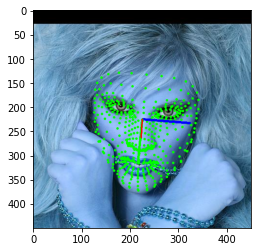

In [9]:
#image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
# loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
mat_file = sio.loadmat('AFLW2000/'+random_file+'.mat')
# extracting the labels 3 angels
pose_para = mat_file["Pose_Para"][0][:3]
pitch = pose_para[0]
yaw = pose_para[1]
roll = pose_para[2]
print(pitch,yaw,roll)
plt.imshow(draw_axis(image,pitch,yaw,roll))

In [10]:
import os
data = []
for filename in os.listdir('AFLW2000/'):
    if filename.endswith("jpg"): 
        # Your code comes here such as 
        print(filename.split('.')[0])
        data.append(filename.split('.')[0])

image00002
image00004
image00006
image00008
image00010
image00013
image00014
image00019
image00020
image00021
image00022
image00023
image00026
image00028
image00032
image00035
image00036
image00039
image00040
image00041
image00042
image00043
image00044
image00045
image00046
image00047
image00048
image00049
image00050
image00051
image00052
image00053
image00054
image00055
image00056
image00057
image00058
image00059
image00060
image00061
image00062
image00063
image00064
image00065
image00066
image00067
image00070
image00072
image00074
image00075
image00076
image00077
image00078
image00079
image00080
image00081
image00082
image00083
image00084
image00087
image00088
image00090
image00091
image00092
image00093
image00095
image00097
image00098
image00099
image00100
image00101
image00102
image00104
image00107
image00108
image00109
image00112
image00114
image00118
image00120
image00122
image00124
image00126
image00127
image00131
image00133
image00134
image00135
image00136
image00137
image00138

In [11]:
# choosing random image
random_file = 'image00013'

def getMat(random_file):
  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      images = [data[0]]
      for img in images:
        image = cv2.imread('AFLW2000/'+random_file+'.jpg')
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          x_arr = []
          y_arr = []
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                  x = landmark.x
                  x_arr.append(x)
                  y = landmark.y
                  y_arr.append(y)
                  # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                  shape = image.shape 
                  relative_x = int(x * shape[1])
                  relative_y = int(y * shape[0])
                  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                  cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
          mat_file = sio.loadmat('AFLW2000/'+random_file+'.mat')
          # extracting the labels 3 angels
          pose_para = mat_file["Pose_Para"][0][:3]
          pitch = pose_para[0]
          yaw = pose_para[1]
          roll = pose_para[2]
          #cv2_imshow(draw_axis(image,pitch,yaw,roll))
          return x_arr,y_arr,yaw,pitch,roll

In [12]:
getMat('image00013')

([0.510209858417511,
  0.4927196204662323,
  0.49973392486572266,
  0.46735110878944397,
  0.48817092180252075,
  0.4835805594921112,
  0.4742501974105835,
  0.3579331040382385,
  0.4686625301837921,
  0.46400484442710876,
  0.44459566473960876,
  0.5123602151870728,
  0.5143053531646729,
  0.515556275844574,
  0.5183807015419006,
  0.5196000933647156,
  0.521497368812561,
  0.5240012407302856,
  0.5295595526695251,
  0.4955962896347046,
  0.4824194014072418,
  0.280727744102478,
  0.410260945558548,
  0.39325404167175293,
  0.3767206370830536,
  0.35422131419181824,
  0.4236077666282654,
  0.3790884017944336,
  0.3967868387699127,
  0.3638869822025299,
  0.35425785183906555,
  0.3422698676586151,
  0.4742661118507385,
  0.35148435831069946,
  0.2902645468711853,
  0.32034650444984436,
  0.414510041475296,
  0.49068835377693176,
  0.498970627784729,
  0.47387927770614624,
  0.4646390676498413,
  0.48648807406425476,
  0.47694510221481323,
  0.4520823061466217,
  0.4789038896560669,
  0

In [13]:
def hasMat(random_file):
  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      images = [data[0]]
      for img in images:
        image = cv2.imread('AFLW2000/'+random_file+'.jpg')
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          x_arr = []
          y_arr = []
          for face in results.multi_face_landmarks:
              for landmark in face.landmark:
                  x = landmark.x
                  x_arr.append(x)
                  y = landmark.y
                  y_arr.append(y)
                  # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                  shape = image.shape 
                  relative_x = int(x * shape[1])
                  relative_y = int(y * shape[0])
                  # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                  cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
          mat_file = sio.loadmat('AFLW2000/'+random_file+'.mat')
          # extracting the labels 3 angels
          pose_para = mat_file["Pose_Para"][0][:3]
          pitch = pose_para[0]
          yaw = pose_para[1]
          roll = pose_para[2]
          #cv2_imshow(draw_axis(image,pitch,yaw,roll))
          return len(x_arr)==468 and len(y_arr)==468

In [14]:
col=[]
for i in range(468):
    col.append('x'+str(i))
for i in range(468):
    col.append('y'+str(i))
col.append("yaw")
col.append("pitch")
col.append("roll")
col.append("image")
features_x468 = []
features_y468 = []
labels = []
for i in data:
  if hasMat(i):
    x,y,yaw,pitch,roll = getMat(i)
    print(i)
    features_x468.append(x)
    features_y468.append(y)
    labels.append([yaw,pitch,roll,i])
temp = np.concatenate((features_x468,features_y468,labels),axis=1)
full_df = pd.DataFrame(temp,columns=col) #convert to a dataframe
full_df

image00002
image00004
image00006
image00008
image00013
image00014
image00019
image00020
image00021
image00022
image00023
image00026
image00028
image00035
image00039
image00040
image00041
image00042
image00043
image00044
image00045
image00046
image00047
image00048
image00049
image00050
image00051
image00052
image00053
image00054
image00055
image00056
image00057
image00058
image00059
image00060
image00061
image00062
image00063
image00064
image00065
image00066
image00067
image00070
image00072
image00075
image00076
image00077
image00078
image00079
image00080
image00081
image00082
image00083
image00084
image00087
image00088
image00090
image00091
image00092
image00093
image00095
image00097
image00098
image00099
image00100
image00101
image00102
image00104
image00107
image00109
image00112
image00114
image00120
image00122
image00124
image00126
image00127
image00131
image00133
image00134
image00135
image00136
image00137
image00138
image00140
image00143
image00144
image00148
image00151
image00152

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y462,y463,y464,y465,y466,y467,yaw,pitch,roll,image
0,0.48561131954193115,0.4891773760318756,0.48977676033973694,0.4797110855579376,0.4905228614807129,0.493611603975296,0.5031788945198059,0.36366036534309387,0.5086324214935303,0.5105621814727783,...,0.6444675922393799,0.48512834310531616,0.4928072392940521,0.5003605484962463,0.47132956981658936,0.46400442719459534,0.018226579,-0.39923078,0.085676216,image00002
1,0.4414963722229004,0.4172613024711609,0.4488351345062256,0.4359915852546692,0.4157339036464691,0.4267823100090027,0.46419838070869446,0.46441853046417236,0.47413086891174316,0.4720669388771057,...,0.6048712730407715,0.506938099861145,0.5117154121398926,0.5149006843566895,0.5002384185791016,0.495373010635376,1.1895334,0.47006503,0.3009588,image00004
2,0.31778109073638916,0.321319580078125,0.31830260157585144,0.31105417013168335,0.3214430510997772,0.3203425109386444,0.3163403868675232,0.2471799999475479,0.31467071175575256,0.31449195742607117,...,0.7797369360923767,0.7177878618240356,0.7208630442619324,0.7233343720436096,0.7130666971206665,0.7097929120063782,0.88113666,-0.18464977,-0.23685244,image00006
3,0.5038936734199524,0.4694940149784088,0.4894774854183197,0.4444103240966797,0.46171680092811584,0.4570901095867157,0.45133885741233826,0.3615582585334778,0.43764469027519226,0.4280368983745575,...,0.6523023247718811,0.5009509921073914,0.5106023550033569,0.5186546444892883,0.4556123912334442,0.444621741771698,0.2992083,-0.17537864,-0.3733745,image00008
4,0.510209858417511,0.4927196204662323,0.49973392486572266,0.46735110878944397,0.48817092180252075,0.4835805594921112,0.4742501974105835,0.3579331040382385,0.4686625301837921,0.46400484442710876,...,0.6136441230773926,0.4818987250328064,0.48864391446113586,0.4926722049713135,0.4526904821395874,0.44856512546539307,0.011965371,-0.026811734,-0.22066212,image00013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,0.5154150724411011,0.5328362584114075,0.518796443939209,0.5116397142410278,0.5353212356567383,0.5328254699707031,0.5210621356964111,0.3601180613040924,0.5185391306877136,0.5204837322235107,...,0.6327998638153076,0.49711254239082336,0.5032260417938232,0.5083939433097839,0.47972097992897034,0.4746260643005371,-0.2838218,-0.3063575,0.038554225,image04345
1850,0.5438743829727173,0.5652893781661987,0.5492713451385498,0.5455763936042786,0.5684722065925598,0.5667146444320679,0.5566830039024353,0.39878204464912415,0.556529700756073,0.5594198107719421,...,0.6420731544494629,0.4930912256240845,0.5002436637878418,0.5064394474029541,0.47980526089668274,0.47087544202804565,-0.42972338,-0.36754662,0.12279096,image04348
1851,0.5864140391349792,0.6045069694519043,0.5938615798950195,0.6030234098434448,0.6096821427345276,0.6140419840812683,0.624655544757843,0.5085465908050537,0.6370838284492493,0.644656240940094,...,0.6431263089179993,0.5372940897941589,0.5394724607467651,0.5414086580276489,0.5476863980293274,0.5401582717895508,0.5671142,-0.15603451,-0.10853576,image04356
1852,0.4915834963321686,0.5006303191184998,0.497266948223114,0.4900573790073395,0.5034013390541077,0.5064204335212708,0.5133620500564575,0.3544463515281677,0.5188745260238647,0.5220601558685303,...,0.6456003189086914,0.4903055429458618,0.4965800344944,0.5025838017463684,0.4818623960018158,0.4742737114429474,-0.07043044,-0.19710165,0.1051178,image04358


In [15]:
df = full_df.copy()
y = df[['yaw', 'pitch', 'roll']]
X = df.copy()
X = X.drop(['yaw', 'pitch', 'roll','image'], axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
model = LinearSVR(C=0.1, dual=True, epsilon=0.05, loss='epsilon_insensitive', tol=1e-05, max_iter=10000)
wrapper = MultiOutputRegressor(model)
wrapper.fit(X_train, y_train)
y_pred = wrapper.predict(X_test)
print("R2 score: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

R2 score:  0.7975248811890029
MSE:  0.02357558857270117


In [18]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel' : ('linear', 'poly'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
# print(y)
# svr = SVR()
# clf = GridSearchCV(svr, parameters)
# clf.fit(X,y['pitch'])
# clf.best_params_


In [19]:
def openCamera():
    cap = cv.VideoCapture(0)
    return cap

def displayCamera(cap):
    while True:
        ret, frame = cap.read()
        cv.imshow('frame', frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

def closeCamera(cap):
    cap.release()
    cv.destroyAllWindows()



In [20]:
x_arr,y_arr,yaw,pitch,roll = getMat('image00004')
points = pd.DataFrame((x_arr+y_arr)).T      
print(points)
yp = wrapper.predict(points)
yp

        0         1         2         3         4         5         6    \
0  0.441496  0.417261  0.448835  0.435992  0.415734  0.426782  0.464198   

        7         8         9    ...       926       927       928       929  \
0  0.464419  0.474131  0.472067  ...  0.599819  0.595605  0.609559  0.600334   

        930       931       932       933       934       935  
0  0.604871  0.506938  0.511715  0.514901  0.500238  0.495373  

[1 rows x 936 columns]


array([[0.93572746, 0.01304223, 0.04797054]])

In [21]:
def get_mesh_data(image,draw_mesh=False):
    faceModule = mediapipe.solutions.face_mesh
    x_relative = []
    y_relative = []
    images_data = []
    mesh_image = image.copy()

    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # collecting image data (x, y of face landmark and pitch, yaw, roll)
        image_data = []
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        if results.multi_face_landmarks != None:
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                lst1=[]
                lst2=[]
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = image.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    lst1.append(x)
                    lst2.append(y)
                    if draw_mesh:
                        cv2.circle(mesh_image, (x, y), radius=1, color=(0, 200, 0), thickness=2)
                    
                x_relative.append(lst1)
                y_relative.append(lst2)
     
    df1 = pd.DataFrame(x_relative)
    df2 = pd.DataFrame(y_relative)
    df =  pd.concat([df1,df2],axis="columns")
    cols = []
    cols += [x+str(i+1) for i in range(468) for x in ['X']]
    cols += [x+str(i+1) for i in range(468) for x in ['Y']]
    df.columns = cols
    return df, image, mesh_image

In [22]:
cols = []
cols += [x+str(i+1) for i in range(468) for x in ['X']]
cols += [x+str(i+1) for i in range(468) for x in ['Y']]

cols

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X121',
 'X122',
 'X123',
 

In [23]:
def detect(frame):
    df_frame, frame,frame_mesh = get_mesh_data(frame, draw_mesh=False)
    if df_frame.size > 0:
        df_frame, image, mesh = get_mesh_data(frame)
        y_pred = wrapper.predict(df_frame)[0]
        pitch = y_pred[0]
        yaw = y_pred[1]
        roll = y_pred[2]
        shape = image.shape 
        relative_x = int(df_frame['X3'] * shape[1])
        relative_y = int(df_frame['Y3'] * shape[0])
        tdx = int(relative_x)
        tdy = int(relative_y)
        print(y_pred)
        return draw_axis(frame_mesh,yaw,pitch,roll, tdx=tdx, tdy=tdy, size=50)
    else:
        return frame

In [24]:
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    c = cv2.waitKey(1) 
    ret, frame = cap.read()
    if frame is not None and ret:
            frame = detect(frame)
    frame = cv2.resize(frame, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
    cv2.imshow('Pose Detection Application', frame)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

[0.03375434 0.01759289 0.00146892]
[-0.07147509  0.0292315   0.06086094]
[-0.09035317  0.02883886  0.05546255]
[-0.08116102 -0.0094293   0.05438664]
[-0.06489086 -0.00892097  0.04022374]
[-0.05195503  0.00352995  0.03366715]
[-0.04276429  0.01148538  0.02812603]
[-0.03174303 -0.00836104  0.0196305 ]
[-0.02994737 -0.01666632  0.01601146]
[-0.02195374 -0.00640927  0.01290306]
[-0.01644066 -0.02695235  0.00777352]
[-0.00291712 -0.0082075   0.01778859]
[-0.01261847 -0.00347637  0.01834078]
[-0.00961917 -0.00966098  0.02028171]
[-0.01324797 -0.00610721  0.01866207]
[-0.0117387  -0.00738971  0.0112974 ]
[-0.00547321 -0.00643433  0.01639389]
[ 0.00018961 -0.00419795  0.02001176]
[-0.00840183 -0.00628295  0.01626924]
[-0.00256706  0.00178714  0.02464628]
[-0.00010863 -0.01928002  0.02063776]
[-0.00694457  0.00237957  0.02041431]
[ 0.00579124 -0.01548464  0.0214689 ]
[ 0.00212465 -0.00299849  0.02133425]
[ 0.00361129 -0.00130787  0.02177995]
[-0.00742496 -0.00368314  0.02072033]
[0.00188036 0.0